In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
def RKF12(f, a, b, alpha, TOL, hmin, hmax):
    t = [a]
    w = [alpha]
    h = hmax
    
    i = 0
    while True:
        k1 = f(t[i], w[i])
        k2 = (f(t[i], w[i]) + f(t[i]+h, w[i]+h*f(t[i], w[i])))/2
        
        R = abs(k2-k1)
        if R <= TOL:
            t.append(t[i]+h)
            w.append(w[i]+h*k1)
            i = i+1
        
        delta = TOL/R
        if delta < 0.1:
            h = 0.1*h
        elif delta > 4:
            h = 4*h
        else:
            h = delta*h
            
        if h > hmax:
            h = hmax
            
        if t[i] >= b:
            break
        elif (t[i]+h) > b:
            h = b-t[i]
        
        if h < hmin:
            print("h below hmin")
            break
        
    return t, w

In [47]:
def RKF45(f, a, b, alpha, TOL, hmin, hmax):
    t = [a]
    w = [alpha]
    h = hmax
    
    i = 0
    while True:
        k1 = h*f(t[i], w[i])
        k2 = h*f(t[i]+h/4, w[i]+k1/4)
        k3 = h*f(t[i]+3*h/8, w[i]+3*k1/32+9*k2/32)
        k4 = h*f(t[i]+12*h/13, w[i]+1932*k1/2197-7200*k2/2197+7296*k3/2197)
        k5 = h*f(t[i]+h, w[i]+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
        k6 = h*f(t[i]+0.5*h, w[i]-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
        
        R = abs(k1/260-128*k3/4275-2197*k4/75240+k5/50+2*k6/55)/h
        if R <= TOL:
            t.append(t[i]+h)
            w.append(w[i]+25*k1/216+1408*k3/2565+2197*k4/4104-k5/5)
            i = i+1
        
        delta = 0.84*(TOL/R)**(1/4)
        if delta < 0.1:
            h = 0.1*h
        elif delta > 4:
            h = 4*h
        else:
            h = delta*h
            
        if h > hmax:
            h = hmax
            
        if t[i] >= b:
            break
        elif (t[i]+h) > b:
            h = b-t[i]
        
        if h < hmin:
            print("h below hmin")
            break
        
    return t, w

In [5]:
def fcn(t, w):
    return (1+w)

In [76]:
rkf12steps, rkf45steps = [], []

for i in np.arange(0, 3, 0.5):
    tol = 10**(-i)
    t12, w12 = RKF12(fcn, 0, 1, -0.5, tol, 0.001, 0.5)
    rkf12steps.append(len(t12))
    t45, w45 = RKF45(fcn, 0, 1, -0.5, tol, 0.001, 0.5)
    rkf45steps.append(len(t45))

rkf12steps, rkf45steps

([3, 3, 5, 14, 44, 136], [3, 3, 3, 3, 3, 3])

In [98]:
t12, w12 = RKF12(fcn, 0, 1, -0.5, 0.01, 0.001, 0.25)
t45, w45 = RKF45(fcn, 0, 1, -0.5, 0.01, 0.001, 0.25)

In [99]:
t12, w12

([0,
  0.03999999999999972,
  0.07846153846153783,
  0.11549857549857455,
  0.15121286121285996,
  0.18569561983354932,
  0.2190289531668824,
  0.2512870176830112,
  0.282537017683011,
  0.3128400479860411,
  0.34225181269192323,
  0.37082324126335164,
  0.39860101904112927,
  0.42562804606815613,
  0.45194383554184014,
  0.47758486118286564,
  0.5025848611828655,
  0.5269751050853044,
  0.550784628894828,
  0.5740404428483162,
  0.5967677155755888,
  0.618989937797811,
  0.6407290682325935,
  0.6620056639772742,
  0.6828389973106075,
  0.7032471605759135,
  0.7232471605759132,
  0.7428550037131678,
  0.7620857729439368,
  0.7809536974722383,
  0.7994722159907566,
  0.8176540341725744,
  0.835511177029717,
  0.8530550366788395,
  0.8702964159891842,
  0.8872455685315568,
  0.9039122351982233,
  0.9203056778211739,
  0.9364347100792382,
  0.9523077259522539,
  0.9679327259522537,
  0.9833173413368689,
  0.9984688564883839,
  1.0],
 [-0.5,
  -0.48000000000000015,
  -0.46000000000000035,


In [100]:
t45, w45

([0, 0.25, 0.5, 0.75, 1.0],
 [-0.5,
  -0.35798684144631404,
  -0.17563820848783945,
  0.05850223511939461,
  0.35914472661027763])

In [101]:
y = [0.5*(np.exp(t_i) - 2) for t_i in t12] # actual solution

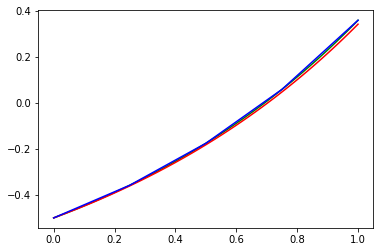

In [102]:
fig, ax = plt.subplots()
ax.plot(t12, y, 'g')
ax.plot(t12, w12, 'r')
ax.plot(t45, w45, 'b')